In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import matplotlib.ticker as mtick

In [3]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"
hedge_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/hedge-fund-data/TOP20HEDGE2020.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content
hedge_download = requests.get(hedge_data_csv_url).content

In [4]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))
hedge_df = pd.read_csv(io.StringIO(hedge_download.decode('utf-8')))

In [5]:
#change PERCENT_CHANGE_12_MONTH to float and find the mean
pol_df2 = pol_df[pol_df.PERCENT_CHANGE_12_MONTH != '#DIV/0!']
pol_df2 = pol_df2.dropna(subset=['PERCENT_CHANGE_12_MONTH'])
pol_df2 = pol_df2['PERCENT_CHANGE_12_MONTH'].astype(float)

pol_12_month_avg = pol_df2.mean()

In [8]:
#create a data frame with hedge data and pol returns
vis_1_df = hedge_df
pol_row = {'HEDGE_NAME': 'Politician Average Returns','PERCENT_RETURNS_2020': pol_12_month_avg}
vis_1_df = vis_1_df.append(pol_row, ignore_index=True)
vis_1_df = vis_1_df.sort_values(by=['PERCENT_RETURNS_2020'], ascending=False)
vis_1_df.head(12)

,HEDGE_NAME,ASSETS_UNDER_MANAGMENT_2020_BILLIONS,RETURNS_2020_BILLIONS,PERCENT_RETURNS_2020
10,Politician Average Returns,NaN,NaN,48.979921
8,Viking Global Investors,20.0,7.0,35.000000
9,Brevan Howard,9.7,3.0,30.930000
1,Millennium Management,43.9,10.2,23.240000
4,Citadel,34.3,6.2,18.080000
5,D.E. Shaw Group,34.3,5.4,15.750000
3,TCI Fund Management,35.0,4.2,12.000000
2,Elliott Management,42.0,5.0,11.910000
6,Farallon Capital Management,30.0,2.9,9.670000
7,Baupost Group,29.1,1.5,5.160000


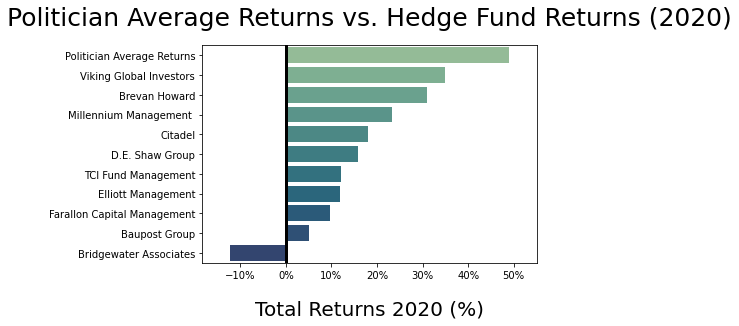

In [7]:
#visualization 1
palette = sns.color_palette("crest",11)
ax=sns.barplot(x=vis_1_df["PERCENT_RETURNS_2020"],y=vis_1_df["HEDGE_NAME"],palette=palette)
ax.axvline(0,color="black",linestyle="-",lw=3)
ax.set_xlabel("Total Returns 2020 (%)",fontsize=20,labelpad=20)
ax.set_title("Politician Average Returns vs. Hedge Fund Returns (2020)", fontsize=25, pad=20)
ax.margins(x=0.1)
ax.set(ylabel=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('bfb_visualization_1_bar')